## The lightweight IBM Cloud Garage Method for data science

A process model to map individual technology components to the reference architecture.

By Romeo Kienzler
Updated October 30, 2020 | Published April 8, 2019

https://developer.ibm.com/articles/the-lightweight-ibm-cloud-garage-method-for-data-science/

The lightweight IBM Cloud Garage Method for data science includes a process model to map individual technology components to the reference architecture. This method does not include any requirement engineering or design thinking tasks. Because it can be hard to initially define the architecture of a project, this method supports architectural changes during the process model. A separate companion article discusses the architectural decision guidelines(https://developer.ibm.com/articles/data-science-architectural-decisions-guidelines/).

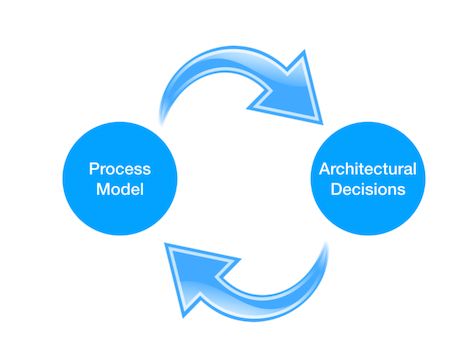

### The lightweight IBM Cloud Garage Method for data science process model

This section introduces this lightweight process model.

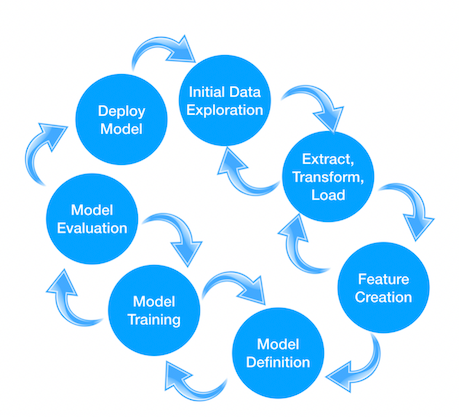

The first thing that you should notice is the similarity to the process models I introduced in my last article(https://developer.ibm.com/articles/architectural-thinking-in-the-wild-west-of-data-science/#ibm-cloud-garage-method). With this model, there are no design tasks because this method is used for projects where the business expectations are already set. Finally, you should notice the increased granularity in the individual tasks. The reason for this is reuse. Every task has a clear purpose and a defined work product (for example, a Jupyter Notebook, a script, or a docker container hosting a scoring or training endpoint, depending on the architectural decisions made).

#### Initial data exploration

This task is crucial for understanding your data. Data quality is the most important driver for success in any data science project. So, this task lets you address data quality from the beginning. This includes going back to the data owners and asking them for better quality data, if applicable.

#### Extract, transform, load (ETL)

This task is an important step in transforming the data from the source system into data suitable for analytics. In traditional data warehousing, this process includes accessing the online transaction processing (OLTP) system’s databases, transforming the data from a highly normalized data model into a Star or Snowflake Schema, and storing the data to a data warehouse. In data science projects, this step is usually much simpler. The data arrives in an exported format (for example, JSON or CSV). But, sometimes de-normalization must be done as well. The result usually ends up in a bulk storage like Cloud Object Store.

#### Feature creation

This task transforms input columns of various relations into additional columns to improve model performance. A subset of those features can be created in an initial task (for example, one-hot encoding of categorical variables or normalization of numerical variables). Some others require business understanding or multiple iterations to be considered. This task is one of those benefiting the most from the highly iterative nature of this method.

#### Model definition

This task defines the machine learning or deep learning model. Because this is a highly iterative method, various iterations within this task or including up- and downstream tasks are possible. I recommend starting with simple models first for baseline creation after those models are evaluated.

#### Model training

This task trains the model. The task is set apart from model definition and evaluation for various reasons. First, training is a computationally intense task that might be scaled on computer clusters or GPUs. Therefore, an architectural cut is sometimes unavoidable. (For example, model definition happens in Keras, but training happens on a Keras model export using Apache SystemML on top of Apache Spark running on a GPU cluster.) In hyperparameter tuning and hyperparameter space exploration, the downstream task “Model Evaluation” can be part of this asset.

#### Model evaluation

This task evaluates the model’s performance. Given the nature of the task, different metrics must be applied, for example, categorical-cross entropy for a multi-class classification problem. It’s important to divide the data set into training, test, and validation (if cross-validation isn’t used) and keep track of the performance of different feature engineering, model definition, and training parameters.

#### Model deployment

This task deploys the model. The task depends heavily on the use case, especially, on the stakeholder’s expectation on consuming the data product. So, valid ways of deployment include:

- An interactive Jupyter Notebook
- An export of an already run, static Jupyter Notebook or some type of report
- A REST endpoint allowing scoring (and training) of the model (for example, backed by a docker container running on Kubernetes)
- A full-fledged web or mobile application

#### Naming convention

Need a structure to name your assets? Here’s our recommended convention. Note that we recommend to always use project_name, while the others are optional.

[project_name].data_exp.<technology>.<version>.<extension>
    
[project_name].etl.<technology>.<version>.<extension>

[project_name].feature_eng.<technology>.<version>.<extension>

[project_name].model_def.<technology>.<version>.<extension>

[project_name].model_train.<technology>.<version>.<extension>

[project_name].model_evaluate.<technology>.<version>.<extension>

[project_name].model_deployment.<technology>.<version>.<extension>
    
#### Summary
    
This article information on the lightweight IBM Cloud Garage Method for data science. It included a process model to map individual technology components to the reference architecture. A separate companion article discusses the architectural decision guidelines(https://developer.ibm.com/articles/data-science-architectural-decisions-guidelines/).

[end]